In [132]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, exp

In [133]:
#Writing the functions
def f1(x, y1):
    return -0.5*y1
def f2(x, y1, y2):
    return 4 - 0.3*y2 - 0.1*y1
def y1_exact(x):
    return 4*exp(-0.5*x)
def y2_exact(x):
    return
def rk4(y1, y2, x, dx):
    k1a = f1(x, y1)
    k2a = f1(x+0.5*dx, y1+0.5*k1a*dx)
    k3a = f1(x+dx*0.5,y1+k2a*0.5*dx)
    k4a = f1(x+dx,y1+k3a*dx)
    y1 += dx*(k1a+2*k2a+2*k3a+k4a)/6
    k1b = f2(x, y1, y2)
    k2b = f2(x+0.5*dx,y1+0.5*k1a*dx, y2+0.5*k1b*dx)
    k3b = f2(x+dx*0.5,y1+k2a*0.5*dx, y2+k2b*0.5*dx)
    k4b = f2(x+dx,y1+k3a*dx, y2+k3b*dx)
    y2 += dx*(k1b+2*k2b+2*k3b+k4b)/6
    return y1, y2

def euler(y1, y2, x, dx):
    y1_new = y1 + dx*(f1(x, y1))
    y2_new = y2 + dx*(f2(x, y1, y2))
    return y1_new, y2_new

def heun_iter(y1, y2, x, dx):
    k1a = f1(x,y1)
    k2a = f1(x+dx,y1+k1a*dx)
    y1 += 0.5*dx*(k1a+k2a)
    k1b = f2(x, y1, y2)
    k2b = f2(x+dx, y1+k1a*dx, y2+k1b*dx)
    y2 += 0.5*dx*(k1b+k2b)
    return y1,y2
def midpoint_iter(y1, y2, x, dx):
    k1a = f1(x,y1)
    k2a = f1(x+0.5*dx,y1+0.5*k1a*dx)
    y1 += k2a*dx
    k1b = f2(x, y1, y2)
    k2b = f2(x+0.5*dx,y1+0.5*k1a*dx,y2+0.5*k1b*dx )
    y2 += k2b*dx
    return y1,y2


In [134]:
#Plotting results
def plot_result(y1, y2, xmax, n):
    dx = xmax/n
    x = 0.0
    allx = []
    r_exact = []
    r1_euler = []
    r2_euler = []
    r1_rk4 = []
    r2_rk4 = []
    r1_heun = []
    r2_heun = []
    r1_midpoint = []
    r2_midpoint = []
    
    y1 = y1_rk4 = y1_euler = y1_midpoint = y1_heun = y10
    y2 = y2_rk4 = y2_euler = y2_midpoint = y2_heun = y20

    for i in range(n):
        y1 = y1_exact(x)
        y1_rk4, y2_rk4 = rk4(y1_rk4, y2_rk4, x, dx)
        y1_euler, y2_euler = euler(y1_euler, y2_euler, x, dx)
        y1_heun, y2_heun = heun(y1_heun, y2_heun, x, dx)
        y1_midpoint, y2_midpoint = midpoint(y1_midpoint, y2_midpoint, x, dx)
        allx.append(x)
        r_exact.append(y1)
        r1_rk4.append(y1_rk4)
        r2_rk4.append(y2_rk4)
        r1_euler.append(y1_euler)
        r2_euler.append(y2_euler)
        x += dx
    
    plt.plot(allx, r1_rk4, label="Runge-Kutta for y1")
    plt.plot(allx, r2_rk4, label="Runge-Kutta for y2")
    plt.plot(allx, r1_euler, label="Euler for y1")
    plt.plot(allx, r2_euler, label="Euler for y2")
    plt.plot(allx, r_exact, label="Exact for y1")
    
    plt.legend(loc=1)
    plt.grid(True)


In [135]:
#Driver code
y10 = 4
y20 = 6
xmax = 2.0
n = 40

plot_result(y10, y20, xmax*2, n*2)


NameError: name 'heun' is not defined

In [136]:
#New Question
def ax(x, y, t):
    return -(x/((x**2+y**2)**(3/2)))
def ay(x, y, t):
    return -(y/((x**2+y**2)**(3/2)))



In [137]:
#rk4
def rk4(x, y, vx, vy, t, dt):
    k1a = ax(x, y, t)
    k1b = ay(x, y, t)
    k2a = ax(x+0.5*k1a*dt, y+0.5*k1b*dt, t+0.5*dt)
    k2b = ay(x+0.5*k1a*dt,y+0.5*k1b*dt, t+0.5*dt)
    k3a = ax(x+dt*0.5*k2a,y+k2b*0.5*dt, t+0.5*dt)
    k3b = ay(x+k2a*0.5*dt, y+k2b*0.5*dt, t+0.5*dt)
    k4a = ax(x+dt*k3a,y+k3b*dt, t+dt)
    k4b = ay(x+k3a*dt, y+k3b*dt, t+dt)
    vx += dt*(k1a+2*k2a+2*k3a+k4a)/6
    vy += dt*(k1b+2*k2b+2*k3b+k4b)/6
    l1a = vx
    l2a = vx + k1a*dt*0.5
    l3a = vx + k2a*dt*0.5
    l4a = vx + k3a*dt
    x += dt*(l1a+2*l2a+2*l3a+l4a)/6
    l1b = vy
    l2b = vy + k1b*dt*0.5
    l3b = vy + k2b*dt*0.5
    l4b = vy + k3b*dt
    y += dt*(l1b+2*l2b+2*l3b+l4b)/6
    
    return x, y, vx, vy

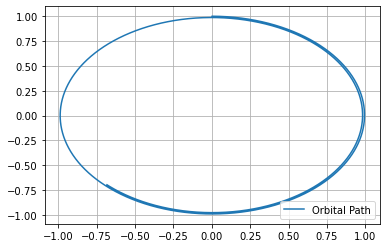

In [148]:
#Plotting
def plot_result(x, y, vx, vy, tmax, n):
    dt = tmax/n
    t = 0.0
    allt = []
    rx_rk4 = []
    ry_rk4 = []
    rvx_rk4 = []
    rvy_rk4 = []
    
    x0 = x_rk4 = x
    y0 = y_rk4 = y
    vx0 = vx_rk4 = vx
    vy0 = vy_rk4 = vy

    for i in range(n):
        
        x_rk4, y_rk4, vx_rk4, vy_rk4 = rk4(x_rk4,y_rk4, vx_rk4, vy_rk4, t, dt)
        allt.append(t)
        rx_rk4.append(x_rk4)
        ry_rk4.append(y_rk4)
        rvx_rk4.append(vx_rk4)
        rvy_rk4.append(vy_rk4)
        t += dt
    
    plt.plot(rx_rk4, ry_rk4, label='Orbital Path')
    plt.legend(loc=4)
    plt.grid(True)
    
x0 = 0 
y0 = 1
vx0 = 1
vy0 = 0
tmax = 10
n = 5000
plot_result(x0, y0, vx0, vy0, tmax, n)